## Random Forest

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import pickle

In [44]:
# Training data
train_data = pd.read_csv(r"C:\Users\yooho\Downloads\bodyPart.csv")
train_df = pd.DataFrame(train_data)

# Testing fata
test_data = pd.read_csv(r"C:\Users\yooho\Downloads\body_wMaterial.csv")
test_df = pd.DataFrame(test_data)

In [45]:
# Encode the 'material' column
label_encoder = LabelEncoder()
train_df['material_encoded'] = label_encoder.fit_transform(train_df['material'])

# Encode the 'materials' column for test data
test_df['material_encoded'] = label_encoder.transform(test_df['materials'])

# Standardizing the numerical columns
features = ['area', 'volume','normalized_joints']
scaler = StandardScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])  # Use the same scaler for the test data

In [46]:
# 2. Train a Random Forest classifier on the training data
X_train = train_df[features]
y_train = train_df['material_encoded']

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [47]:
# Test the classifier on the testing data
X_test = test_df[features]
y_test = test_df['material_encoded']
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 40.13%


In [23]:
test_df['predicted_materials'] = label_encoder.inverse_transform(clf.predict(test_df[features]))
print(classification_report(test_df['materials'], test_df['predicted_materials']))
print("Accuracy:", accuracy_score(test_df['materials'], test_df['predicted_materials']))

# If you only want to make predictions without evaluating the model:
predictions = label_encoder.inverse_transform(clf.predict(test_df[features]))
test_df['predicted_materials'] = predictions
print(test_df)

                     precision    recall  f1-score   support

     Metal_Aluminum       0.00      0.00      0.00       170
      Metal_Ferrous       0.09      0.11      0.10       104
Metal_Ferrous_Steel       0.31      0.62      0.41       572
  Metal_Non-Ferrous       0.00      0.00      0.00       215
              Other       0.25      0.36      0.29       347
            Plastic       0.00      0.00      0.00       358
               Wood       0.00      0.00      0.00        83

           accuracy                           0.27      1849
          macro avg       0.09      0.15      0.11      1849
       weighted avg       0.15      0.27      0.19      1849

Accuracy: 0.2650081124932396
      Unnamed: 0             body_name            materials         area  \
0              0                  axil        Metal_Ferrous   122.504972   
1              1                 screw  Metal_Ferrous_Steel     4.416154   
2              2                  deck                 Wood  3354.659

C:\Users\yooho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yooho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yooho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

In [48]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Separate features and target
X_train = train_df[features]
y_train = train_df['material_encoded']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\yooho\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_resampled, y_resampled)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Best model
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [50]:
from sklearn.metrics import classification_report

# Predict on test data
y_pred = best_rf.predict(test_df[features])

# Evaluate
print(classification_report(test_df['material_encoded'], y_pred))

              precision    recall  f1-score   support

           0       0.66      0.15      0.24       170
           1       0.21      0.14      0.17       104
           2       0.79      0.10      0.18       572
           3       0.13      0.73      0.22       215
           4       0.93      0.16      0.27       347
           5       0.70      0.08      0.15       358
           6       0.16      0.67      0.26        83

    accuracy                           0.21      1849
   macro avg       0.51      0.29      0.21      1849
weighted avg       0.65      0.21      0.20      1849



## KNN

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [5]:
# Training data
train_data = pd.read_csv(r"C:\Users\yooho\Downloads\bodyPart.csv")
train_df = pd.DataFrame(train_data)

# Testing fata
test_data = pd.read_csv(r"C:\Users\yooho\Downloads\body_wMaterial.csv")
test_df = pd.DataFrame(test_data)

# Features and target variable
features = ['area', 'volume','normalized_joints']
target = 'material'

# Scaling
scaler = StandardScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])

# Training
knn = KNeighborsClassifier(n_neighbors=7) # You can change the number of neighbors and experiment
knn.fit(train_df[features], train_df[target])

# Prediction
predictions = knn.predict(test_df[features])

# Evaluation
print(classification_report(test_df['materials'], predictions))

                     precision    recall  f1-score   support

     Metal_Aluminum       0.47      0.50      0.49       170
      Metal_Ferrous       0.54      0.58      0.56       104
Metal_Ferrous_Steel       0.64      0.67      0.66       572
  Metal_Non-Ferrous       0.63      0.55      0.59       215
              Other       0.53      0.55      0.54       347
            Plastic       0.57      0.55      0.56       358
               Wood       0.41      0.37      0.39        83

           accuracy                           0.58      1849
          macro avg       0.54      0.54      0.54      1849
       weighted avg       0.58      0.58      0.57      1849



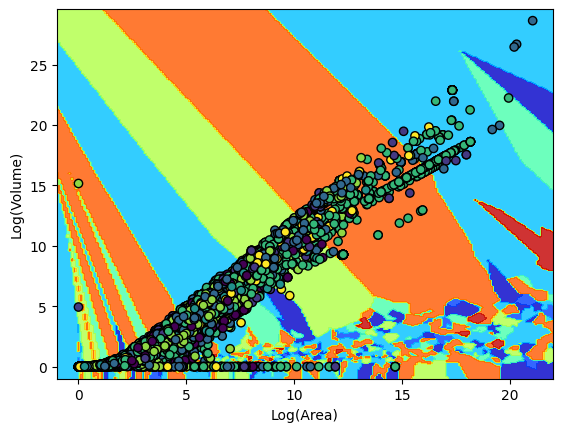

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Train the KNN model
X = train_data[['area', 'volume']].values
y = train_data['material'].values

# Use a label encoder to transform classes into integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y_encoded)

# Create a mesh of points
X_log = np.log1p(X)  # adds 1 before taking logarithm to avoid log(0)
x_min, x_max = X_log[:, 0].min() - 1, X_log[:, 0].max() + 1
y_min, y_max = X_log[:, 1].min() - 1, X_log[:, 1].max() + 1

step_size = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                     np.arange(y_min, y_max, step_size))

# Predict the class for each mesh point
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.jet)
plt.scatter(X_log[:, 0], X_log[:, 1], c=y_encoded, edgecolors='k', marker='o')
plt.xlabel('Log(Area)')
plt.ylabel('Log(Volume)')
plt.show()

## Correlation

In [5]:
data_cor = pd.read_csv(r"C:\Users\yooho\Downloads\bodyPart.csv")

ValueError: could not convert string to float: 'Guage glass'

In [8]:
# Training data
train_data = pd.read_csv(r"C:\Users\yooho\Downloads\bodyPart.csv")
train_df = pd.DataFrame(train_data)

# Testing data
test_data = pd.read_csv(r"C:\Users\yooho\Downloads\body_wMaterial.csv")
test_df = pd.DataFrame(test_data)

# Features and target variable
features = ['area', 'volume','normalized_joints']
target = 'material'

# Scaling
scaler = StandardScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])

# Encode the 'material' column
label_encoder = LabelEncoder()
train_df['material_encoded'] = label_encoder.fit_transform(train_df['material'])

# Encode the 'materials' column for test data
test_df['material_encoded'] = label_encoder.transform(test_df['materials'])

# Standardizing the numerical columns
features = ['area', 'volume','normalized_joints']
scaler = StandardScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])  # Use the same scaler for the test data

In [13]:
print(train_df)

       Unnamed: 0                    name      area    volume  \
0               0             Guage glass -0.059895 -0.012674   
1               1             Upper Frame -0.059888 -0.012674   
2               2                Receiver -0.059885 -0.012674   
3               3              SilverDing -0.059896 -0.012674   
4               4          SilverDing (1) -0.059896 -0.012674   
...           ...                     ...       ...       ...   
11197       11197           main pipe (1) -0.059859 -0.012674   
11198       11198  frame handle shape (1) -0.059876 -0.012674   
11199       11199             caster fork -0.059868 -0.012674   
11200       11200            back metal 1 -0.059889 -0.012674   
11201       11201          main frame (2) -0.059895 -0.012674   

       normalized_joints             material  material_encoded  
0              -0.085639  Metal_Ferrous_Steel                 2  
1              -0.085639    Metal_Non-Ferrous                 3  
2              -0.085

In [22]:
# Select only numeric columns
numeric_df = train_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

#print(corr_matrix)

corr_matrix["material_encoded"].sort_values(ascending=False)

material_encoded     1.000000
area                 0.002000
normalized_joints   -0.007748
volume              -0.008538
Unnamed: 0          -0.094307
Name: material_encoded, dtype: float64

## body_wMaterial2

In [53]:
# Random Forest
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split  # For splitting the data
import pickle

# Load the data
data = pd.read_csv(r"C:\Users\yooho\Downloads\body_wMaterial_v3.csv")
df = pd.DataFrame(data)

# Encode the 'material' column
label_encoder = LabelEncoder()
df['material_encoded'] = label_encoder.fit_transform(df['material'])

# Standardizing the numerical columns
features = ['area', 'volume', 'normalized_joints', 'normalized_contacts', 'normalized_holes']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Split the dataset into training and test sets
X = df[features]
y = df['material_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 80% train, 20% test

# Train a Random Forest classifier on the training data
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

# Test the classifier on the test set
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

df_test_results = pd.DataFrame({'Actual_materials': label_encoder.inverse_transform(y_test),
                                'Predicted_materials': label_encoder.inverse_transform(y_pred)})

print(classification_report(df_test_results['Actual_materials'], df_test_results['Predicted_materials']))
print("Accuracy:", accuracy_score(df_test_results['Actual_materials'], df_test_results['Predicted_materials']))

print(df_test_results)

Accuracy: 45.20%
                     precision    recall  f1-score   support

     Metal_Aluminum       0.46      0.24      0.31       169
      Metal_Ferrous       0.37      0.12      0.18       107
Metal_Ferrous_Steel       0.36      0.69      0.47       529
  Metal_Non-Ferrous       0.60      0.30      0.40       281
              Other       0.63      0.47      0.54       540
            Plastic       0.45      0.43      0.44       474
               Wood       0.48      0.39      0.43       141

           accuracy                           0.45      2241
          macro avg       0.48      0.38      0.40      2241
       weighted avg       0.49      0.45      0.44      2241

Accuracy: 0.45203034359660865
         Actual_materials  Predicted_materials
0           Metal_Ferrous                Other
1                 Plastic                Other
2       Metal_Non-Ferrous    Metal_Non-Ferrous
3                 Plastic       Metal_Aluminum
4                 Plastic  Metal_Ferrous_Ste

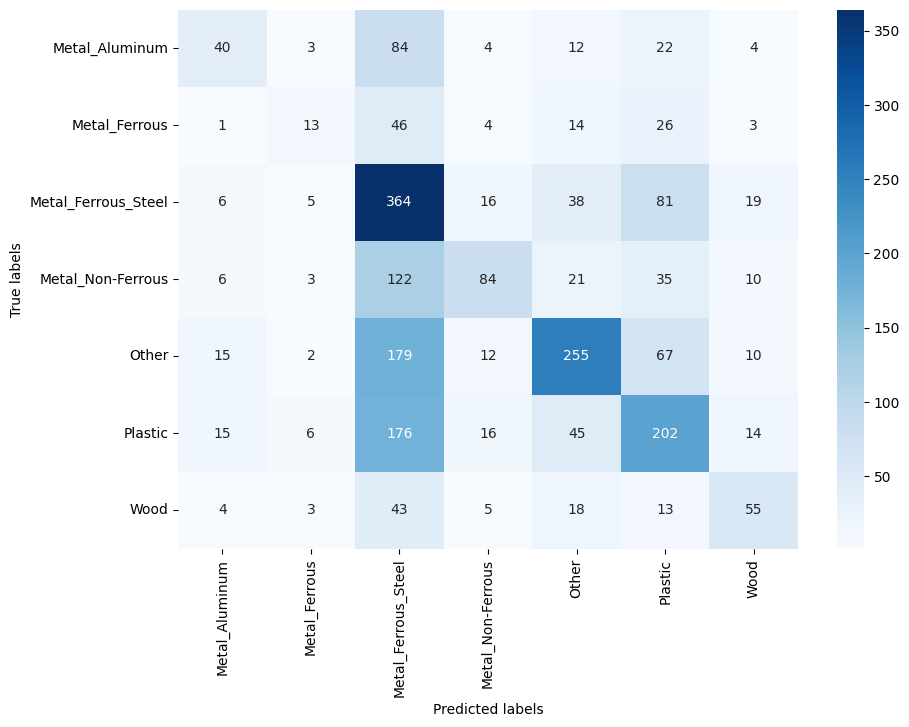

In [54]:
# Generate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Getting the label names from the LabelEncoder
labels = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [55]:
# KNN
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split  # For splitting the data

# Load the data
data = pd.read_csv(r"C:\Users\yooho\Downloads\body_wMaterial_v3.csv")
df = pd.DataFrame(data)

# Features and target variable
features = ['area', 'volume', 'normalized_joints', 'normalized_contacts', 'normalized_holes']
target = 'material'

# Scaling the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Split the dataset into training and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 80% train, 20% test

# Training KNN classifier
knn = KNeighborsClassifier(n_neighbors=7) # You can change the number of neighbors and experiment
knn.fit(X_train, y_train)

# Prediction on the test set
predictions = knn.predict(X_test)

# Evaluation
print(classification_report(y_test, predictions))

                     precision    recall  f1-score   support

     Metal_Aluminum       0.44      0.47      0.46       169
      Metal_Ferrous       0.32      0.28      0.30       107
Metal_Ferrous_Steel       0.50      0.61      0.55       529
  Metal_Non-Ferrous       0.54      0.51      0.52       281
              Other       0.60      0.59      0.60       540
            Plastic       0.53      0.48      0.50       474
               Wood       0.51      0.38      0.43       141

           accuracy                           0.52      2241
          macro avg       0.49      0.47      0.48      2241
       weighted avg       0.52      0.52      0.52      2241



In [27]:
pip install seaborn


     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     -------------------------------------  286.7/293.3 kB 5.9 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 6.0 MB/s eta 0:00:00


                     precision    recall  f1-score   support

     Metal_Aluminum       0.53      0.62      0.57       169
      Metal_Ferrous       0.51      0.43      0.47       107
Metal_Ferrous_Steel       0.63      0.64      0.63       529
  Metal_Non-Ferrous       0.65      0.64      0.65       281
              Other       0.70      0.71      0.71       540
            Plastic       0.61      0.59      0.60       474
               Wood       0.61      0.59      0.60       141

           accuracy                           0.63      2241
          macro avg       0.61      0.60      0.60      2241
       weighted avg       0.63      0.63      0.63      2241

[[104   3  26   8   8  12   8]
 [  6  46  16   5  15  18   1]
 [ 24  10 338  32  52  63  10]
 [ 10   5  29 181  24  28   4]
 [ 19  10  41  24 386  43  17]
 [ 27  15  66  22  52 278  14]
 [  5   1  20   7  14  11  83]]


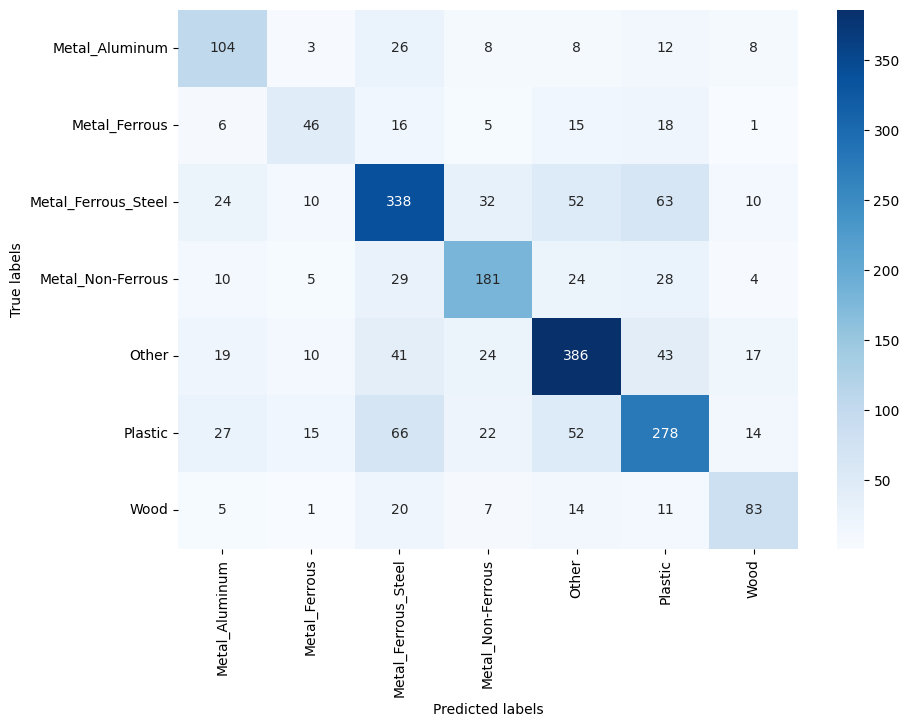

In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"C:\Users\yooho\Downloads\body_wMaterial_v3.csv")
df = pd.DataFrame(data)

# Features and target variable
features = ['area', 'volume', 'normalized_joints', 'normalized_contacts', 'normalized_holes']
target = 'material'
#print(df[target][50:60])

# Encode the 'material' column
label_encoder = LabelEncoder()
df['material_encoded'] = label_encoder.fit_transform(df[target])
#print(df['material_encoded'][50:60])

# Scaling the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Splitting the dataset into training and test sets
X = df[features]
y = df['material_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 80% train, 20% test

# Training KNN classifier
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred, target_names=labels))

# Generate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

# Getting the label names from the LabelEncoder
labels = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [41]:
combined_df = pd.concat([df[target], df['material_encoded']], axis=1)
combined_df.to_csv("materials.csv", index=False)

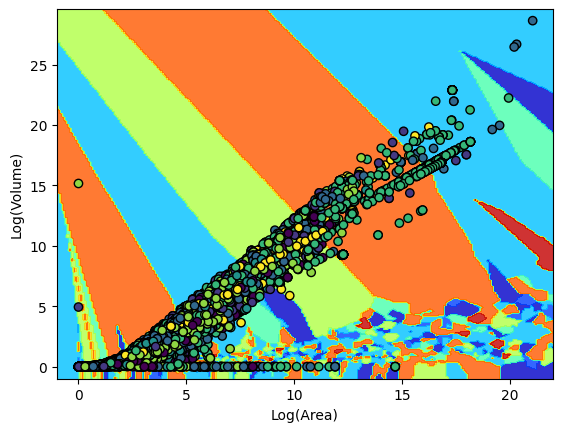

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Train the KNN model
X = data[['area', 'volume']].values
y = data['material'].values

# Use a label encoder to transform classes into integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y_encoded)

# Create a mesh of points
X_log = np.log1p(X)  # adds 1 before taking logarithm to avoid log(0)
x_min, x_max = X_log[:, 0].min() - 1, X_log[:, 0].max() + 1
y_min, y_max = X_log[:, 1].min() - 1, X_log[:, 1].max() + 1

step_size = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                     np.arange(y_min, y_max, step_size))

# Predict the class for each mesh point
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.jet)
plt.scatter(X_log[:, 0], X_log[:, 1], c=y_encoded, edgecolors='k', marker='o')
plt.xlabel('Log(Area)')
plt.ylabel('Log(Volume)')
plt.show()

In [20]:
# Correlation
data_cor = pd.read_csv(r"C:\Users\yooho\Downloads\body_wMaterial_v3.csv")
df = pd.DataFrame(data)

# Features and target variable
features = ['area', 'volume','normalized_joints', 'normalized_contacts', 'normalized_holes']
target = 'material'

# Scaling the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Encode the 'material' column
label_encoder = LabelEncoder()
df['material_encoded'] = label_encoder.fit_transform(df[target])


X = df[features]
y = df['material_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 80% train, 20% test

In [21]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

#print(corr_matrix)

corr_matrix["material_encoded"].sort_values(ascending=False)

material_encoded       1.000000
normalized_contacts    0.015484
area                   0.001980
normalized_holes      -0.005877
normalized_joints     -0.006659
volume                -0.008590
Unnamed: 0            -0.091235
Name: material_encoded, dtype: float64